# Pakistani Dataset Legal Recommendation System EDA

In [ ]:
import numpy as np
import pandas as pd
import sklearn.preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
import nltk
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
from keras.utils import np_utils
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TUKL summer internship/week 2/Supreme Court Data 5.csv')

In [ ]:
df.head()

,Case Files,Label,Category
0,2017 P T D 1481\n[Supreme Court of Pakistan]\n...,Non-Bailable,Against Federation
1,2015 S C M R 365\n[Supreme Court of Pakistan]\...,Bailable,illegal appointments
2,2016 S C M R 1420\n[Supreme Court of Pakistan]...,Bailable,Theft/Fraud
3,2016 S C M R 662\n[Supreme Court of Pakistan]\...,Bailable,Theft/Fraud
4,P L D 2012 Supreme Court 649\nPresent: Mian Sh...,Bailable,illegal appointments


In [ ]:
df['Label'].value_counts()

Bailable        43
Non-Bailable    23
Name: Label, dtype: int64

In [ ]:
df['Category'].value_counts()

illegal appointments     24
Crime                    14
Theft/Fraud              11
Tax evasion               7
Against Federation        5
Islamic Law Violation     4
Theft/fraud               1
Name: Category, dtype: int64

In [ ]:
df.dtypes

Case Files    object
Label         object
Category      object
dtype: object

In [ ]:
df.shape

(66, 3)

In [ ]:
df.describe()

,Case Files,Label,Category
count,66,66,66
unique,66,2,7
top,\n2015 S C M R 1385\n[Supreme Court of Pakist...,Bailable,illegal appointments
freq,1,43,24


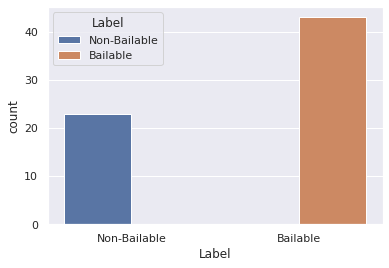

In [ ]:
sns.countplot(x="Label",hue="Label",data=df)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

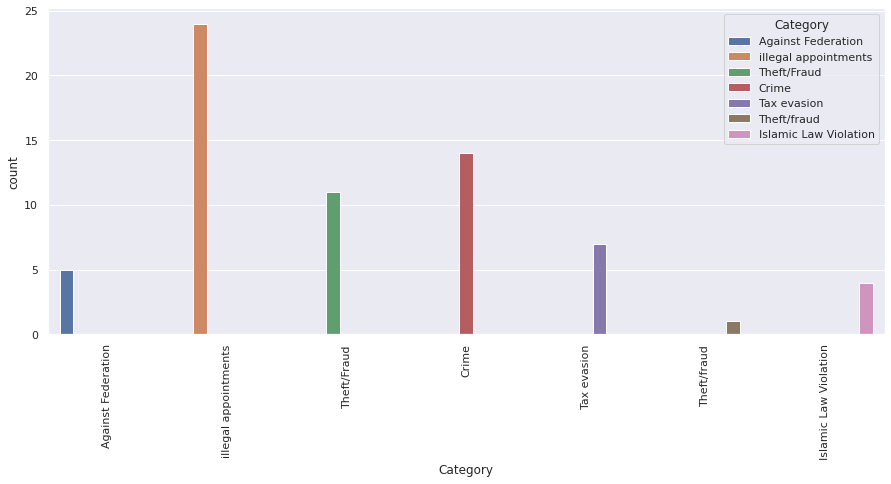

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="Category",hue="Category",data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

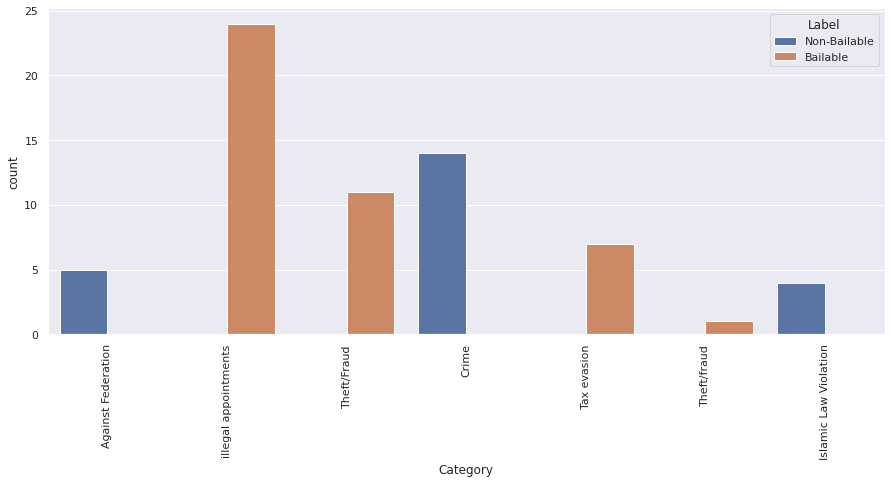

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="Category",hue="Label",data=df)
plt.xticks(rotation=90)

In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Check if there are any null values
df1 = df[['Case Files','Label']]
df1.isnull().sum()

Case Files    0
Label         0
dtype: int64

In [ ]:
df1.head()

,Case Files,Label
0,2017 P T D 1481\n[Supreme Court of Pakistan]\n...,Non-Bailable
1,2015 S C M R 365\n[Supreme Court of Pakistan]\...,Bailable
2,2016 S C M R 1420\n[Supreme Court of Pakistan]...,Bailable
3,2016 S C M R 662\n[Supreme Court of Pakistan]\...,Bailable
4,P L D 2012 Supreme Court 649\nPresent: Mian Sh...,Bailable


In [ ]:
def cleaning(df, stop_words):

    df['Case Files'] = df['Case Files'].apply(lambda x: ' '.join(x.lower() for x in x.split())) 

                               

    # Replacing the digits/numbers

    df['Case Files'] = df['Case Files'].str.replace('d', '')

            

    # Removing stop words

    df['Case Files'] = df['Case Files'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))

    #lower casing
    df['Case Files'] = df['Case Files'].str.lower()

    #punctuation removal         
    df["Case Files"] = df["Case Files"].apply(lambda text: remove_punctuation(text))
    # Lemmatization

    df['Case Files'] = df['Case Files'].apply(lambda x: ' '.join([Word(x).lemmatize() for x in x.split()]))

            

    return df

stop_words = stopwords.words('english')

df1 = cleaning(df1, stop_words)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [ ]:
df1.head()

,Case Files,Label
0,2017 p 1481 supreme court pakistan present mia...,Non-Bailable
1,2015 c r 365 supreme court pakistan present na...,Bailable
2,2016 c r 1420 supreme court pakistan present a...,Bailable
3,2016 c r 662 supreme court pakistan present an...,Bailable
4,p l 2012 supreme court 649 present mian shakir...,Bailable


In [ ]:
df2 = df1.rename(columns={'Case Files': 'Case_Files'})

In [ ]:
df2.head()

,Case_Files,Label
0,2017 p 1481 supreme court pakistan present mia...,Non-Bailable
1,2015 c r 365 supreme court pakistan present na...,Bailable
2,2016 c r 1420 supreme court pakistan present a...,Bailable
3,2016 c r 662 supreme court pakistan present an...,Bailable
4,p l 2012 supreme court 649 present mian shakir...,Bailable


In [ ]:
df2.Case_Files

0     2017 p 1481 supreme court pakistan present mia...
1     2015 c r 365 supreme court pakistan present na...
2     2016 c r 1420 supreme court pakistan present a...
3     2016 c r 662 supreme court pakistan present an...
4     p l 2012 supreme court 649 present mian shakir...
                            ...                        
61    2016 c r 475 supreme court pakistan present ej...
62    2018 c l 177 supreme court pakistan present ej...
63    2020 c r 465 supreme court pakistan present qa...
64    p l 2017 supreme court 99 present mian saqib n...
65    2017 p l c c 428 supreme court pakistan presen...
Name: Case_Files, Length: 66, dtype: object

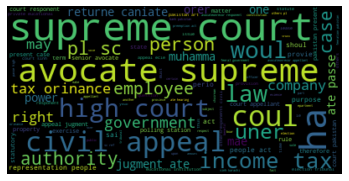

In [ ]:
#visualization the most common words
common_words=''
for i in df2.Case_Files:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#tokenizer
#Num_words – This hyperparameter refers to the number of words to keep based on the frequency of words.
#Split – This hyperparameter refers to the separator used for splitting the word.
#pad_sequence() function is used to convert a list of sequences into a 2D NumPy array.
#Tokenization and conversion into numerical vectors
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(df2['Case_Files'].values)
X = tokenizer.texts_to_sequences(df2['Case_Files'].values)
X = pad_sequences(X)

In [ ]:
X.shape[1]

1779

In [ ]:
#neural nets can learn word embeddings by themselves
model = Sequential()
model.add(Embedding(500, 1028, input_length = X.shape[1]))#500 because tokenizer num_words=500 and 120 instead of this it can be anything
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(MaxPooling1D(pool_size=2))
model.add(MaxPooling1D(pool_size=2))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2))# LSTM units can be anything drop out value can be anything
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))# 2 because binary labels

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 1779, 1028)        514000    
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 1779, 32)          98720     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 889, 32)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 889, 64)           6208      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 444, 64)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 444, 128)          24704     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 222, 128)         

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer='adam', metrics = ['accuracy'])

In [ ]:
y=df['Label']
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
y=obj.fit_transform(y)
#y=pd.get_dummies(df2['Label'])

In [ ]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
batch_size=128
model.fit(X_train, y_train,validation_split=0.1,epochs = 10, batch_size=batch_size, verbose = 'auto')

Epoch 1/10
1/1 [==============================] - 33s 33s/step - loss: 0.6930 - accuracy: 0.5435 - val_loss: 0.6827 - val_accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 0.6808 - accuracy: 0.6739 - val_loss: 0.6559 - val_accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 0.6523 - accuracy: 0.6739 - val_loss: 0.6220 - val_accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 0.6206 - accuracy: 0.6739 - val_loss: 0.6392 - val_accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 0.6520 - accuracy: 0.6739 - val_loss: 0.6209 - val_accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 0.6076 - accuracy: 0.6739 - val_loss: 0.6289 - val_accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 0.6053 - accuracy: 0.6739 - val_loss: 0.6293 - val_accuracy: 0.6667
Epoch 8/10
1/1 [=======================

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 245ms/step - loss: 0.7514 - accuracy: 0.5714


[0.7514468431472778, 0.5714285969734192]